In [8]:
import CoolProp.CoolProp as CP
import pandas as pd
import numpy as np

fluids = ['Water', 'R134a', 'Ammonia']
for fluid in fluids:
    T_min = CP.PropsSI('Tmin', fluid) + 1  # Adding a small offset to Tmin for stability
    T_max = CP.PropsSI('Tcrit', fluid)
    T_vals = np.linspace(T_min, T_max, 100)  # Adjust the number of points as needed

    # Data generation for each diagram type
    p_h_data = {'Pressure': [], 'Enthalpy': []}
    p_T_data = {'Pressure': [], 'Temperature': []}
    T_s_data = {'Temperature': [], 'Entropy': []}

    for T in T_vals:
        p_h_data['Pressure'].append(CP.PropsSI('P', 'T', T, 'Q', 0, fluid))
        p_h_data['Enthalpy'].append(CP.PropsSI('H', 'T', T, 'Q', 0, fluid))

        p_T_data['Pressure'].append(CP.PropsSI('P', 'T', T, 'Q', 0, fluid))
        p_T_data['Temperature'].append(T)

        T_s_data['Temperature'].append(T)
        T_s_data['Entropy'].append(CP.PropsSI('S', 'T', T, 'Q', 0, fluid))

    # Convert to DataFrames and save as CSV files
    pd.DataFrame(p_h_data).to_csv(f'{fluid}_p-h.csv', index=False)
    pd.DataFrame(p_T_data).to_csv(f'{fluid}_p-T.csv', index=False)
    pd.DataFrame(T_s_data).to_csv(f'{fluid}_T-s.csv', index=False)


In [9]:

import ipywidgets as widgets
from IPython.display import display

# Dropdown for fluid selection
fluid_dropdown = widgets.Dropdown(
    options=['Water', 'R134a', 'Ammonia'],
    value='Water',
    description='Fluid:',
)

# Dropdown for diagram selection
diagram_dropdown = widgets.Dropdown(
    options=['p-h', 'p-T', 'T-s'],
    value='p-h',
    description='Diagram:',
)

display(fluid_dropdown, diagram_dropdown)


Dropdown(description='Fluid:', options=('Water', 'R134a', 'Ammonia'), value='Water')

Dropdown(description='Diagram:', options=('p-h', 'p-T', 'T-s'), value='p-h')

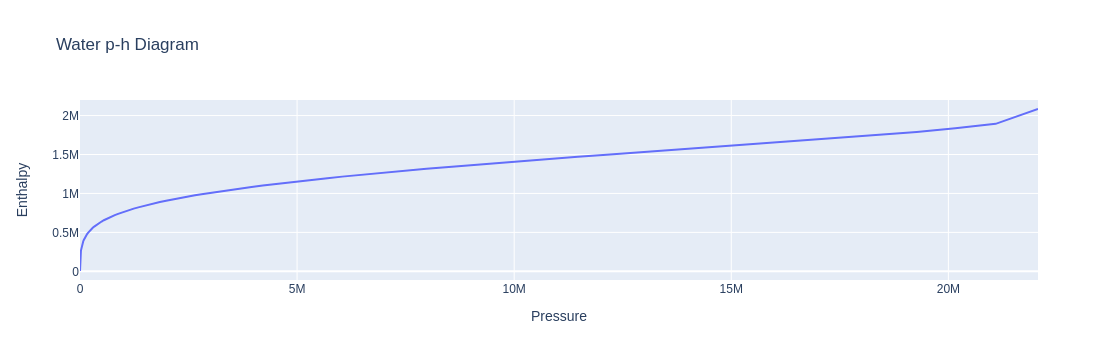

In [13]:
import plotly.express as px

def update_plot(change):
    # Load data from CSV
    fluid = fluid_dropdown.value
    diagram = diagram_dropdown.value
    df = pd.read_csv(f'{fluid}_{diagram}.csv')

    # Plot using Plotly or any other preferred library
    fig = px.line(df, x=df.columns[0], y=df.columns[1], title=f'{fluid} {diagram} Diagram')
    fig.show()

# Add observers to dropdowns
fluid_dropdown.observe(update_plot, names='value')
diagram_dropdown.observe(update_plot, names='value')

# Initial plot
update_plot(None)
